In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 깨짐 방지

In [3]:
plt.rcParams['figure.figsize'] = (10, 8)  # figsize 설정


In [8]:
df = pd.read_csv("../data/Pokemon.csv")
df.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


- Name: 포켓몬 이름
- Type 1: 포켓몬 타입 1
- Type 2: 포켓몬 타입 2
- Total: 포켓몬 총 능력치 (Sum of ‘HP’, ‘Attack’, ‘Defense’, ‘Sp.Atk’, ‘Sp.Def’ and ‘Speed’)
- HP: 포켓몬 HP 능력치
- Attack: 포켓몬 Attack 능력치
- Defense: 포켓몬 Defense 능력치
- Sp.Atk: 포켓몬 Sp.Atk 능력치
- Sp.Def: 포켓몬 Sp.Def 능력치
- Speed: 포켓몬 Speed 능력치
- Generation: 포켓몬 세대
- Legendary: 전설의 포켓몬 여부

## EDA

In [9]:
df.shape

(1072, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       574 non-null    object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB


In [11]:
# 결측치
df.isnull().sum()

number          0
name            0
type1           0
type2         498
total           0
hp              0
attack          0
defense         0
sp_attack       0
sp_defense      0
speed           0
generation      0
legendary       0
dtype: int64

In [13]:
# class 별 데이터 수 확인
df['legendary'].value_counts()

False    954
True     118
Name: legendary, dtype: int64

In [14]:
# 세대별 데이터 수 확인
df['generation'].value_counts()

1    178
5    166
3    160
8    139
4    121
7    114
2    106
6     85
0      3
Name: generation, dtype: int64

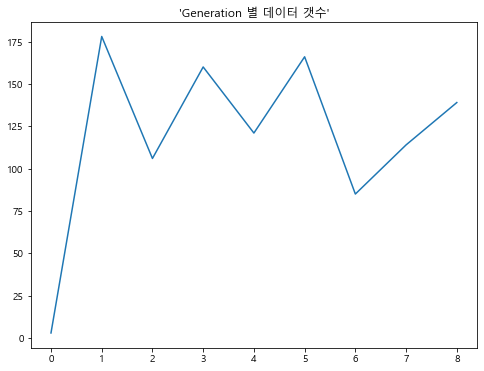

In [15]:
# 세대 순서로 데이터 갯수 시각화
fig = plt.figure(figsize=(8, 6))
df['generation'].value_counts().sort_index().plot()
plt.title("'Generation 별 데이터 갯수'")
plt.show()

In [19]:
# unique value of "type1"
df['type1'].unique()

array(['Grass', 'Fire', 'Water', 'Blastoise', 'Bug', 'Normal', 'Dark',
       'Poison', 'Electric', 'Ground', 'Ice', 'Fairy', 'Steel',
       'Fighting', 'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying',
       'Graass'], dtype=object)

In [20]:
# No. of unique value for "type1"
len(df['type1'].unique())

20

In [21]:
# unique value of "type2"  (exclude "NaN")
df[df['type2'].notnull()]['type2'].unique()

array(['Poison', 'Flying', 'Dragon', 'Water', 'Normal', 'Psychic',
       'Steel', 'Ground', 'Fairy', 'Grass', 'Fighting', 'Electric', 'Ice',
       'Dark', 'Ghost', 'Rock', 'Fire', 'Bug'], dtype=object)

In [22]:
# No. of unique value for "type2"
len(df[df['type2'].notnull()]['type2'].unique())

18

### 능력치 분포

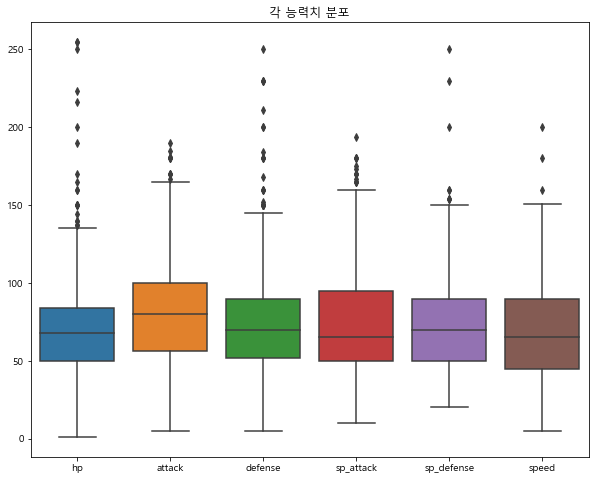

In [26]:
# 전체 포켓몬의 각 능력치 분포

stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed'] # 능력치 변수 집합
sns.boxplot(data = df[stats])
plt.title('각 능력치 분포')
plt.show()

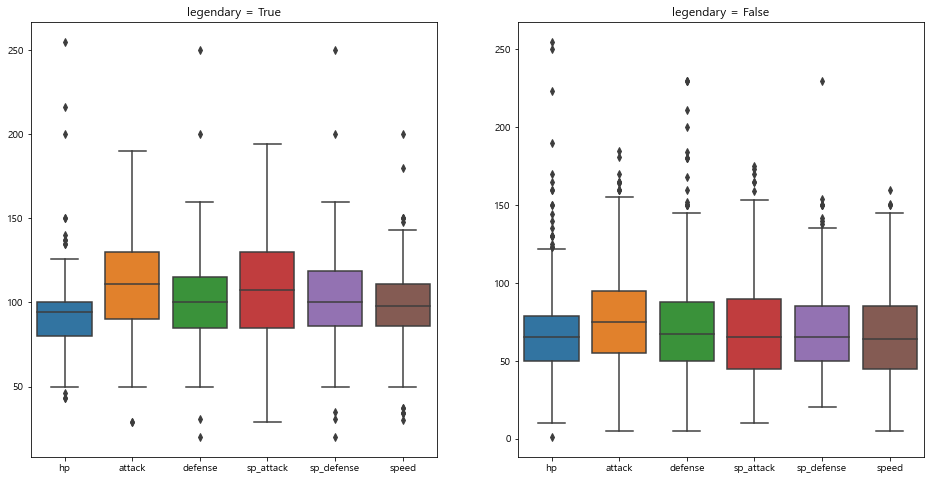

In [27]:
# "전설의 포켓몬" 여부에 따른 능력치 분포

fig = plt.figure(figsize=(16, 8))

plt.subplot(1,2,1)
sns.boxplot(data = df[df['legendary']==1][stats])
plt.title('legendary = True')

plt.subplot(1,2,2)
sns.boxplot(data = df[df['legendary']==0][stats])
plt.title('legendary = False')

plt.show()

### 총능력치total 분포

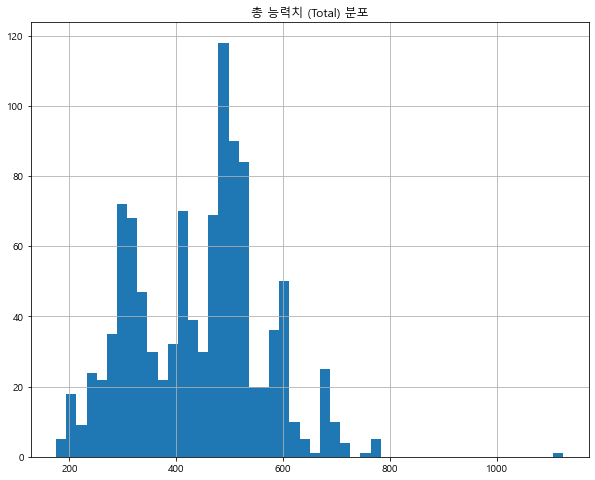

In [29]:
# 전체 포켓몬의 총 능력치 분포

df['total'].hist(bins=50)
plt.title('총 능력치 (Total) 분포')
plt.show()

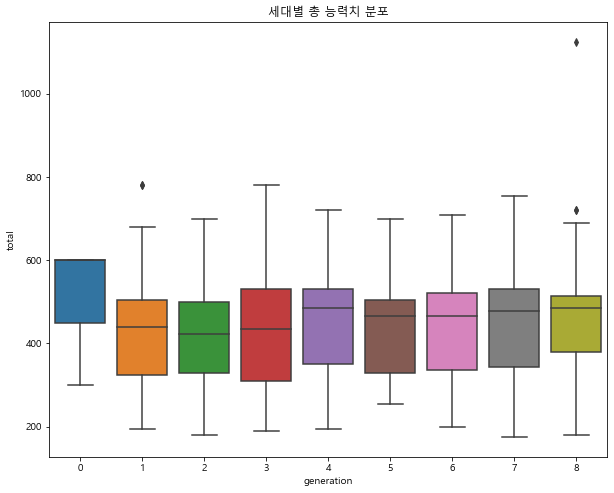

In [30]:
# 세대별 총 능력치 분포
sns.boxplot(data = df, x = "generation", y="total")
plt.title("세대별 총 능력치 분포")
plt.show()

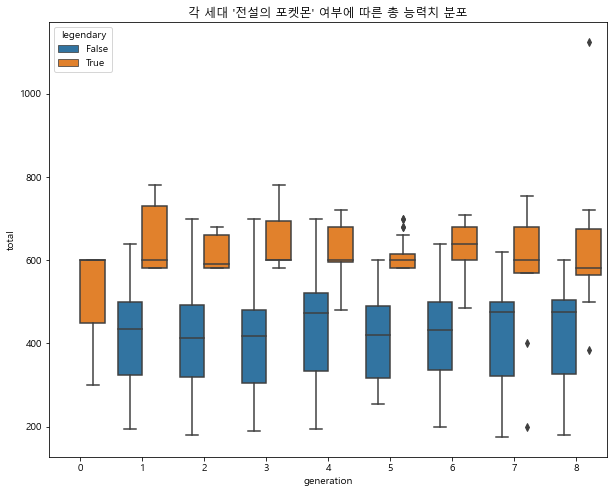

In [31]:
# 각 세대 "전설의 포켓몬" 여부에 따른 총 능력치 분포
sns.boxplot(data = df, x = "generation", y="total", hue="legendary")
plt.title("각 세대 '전설의 포켓몬' 여부에 따른 총 능력치 분포")
plt.show()

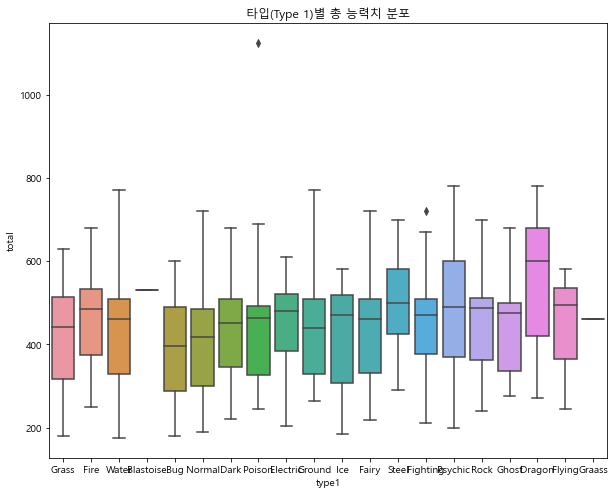

In [32]:
# 타입(Type 1)별 총 능력치 분포
sns.boxplot(data = df, x = 'type1', y = 'total')
plt.title("타입(Type 1)별 총 능력치 분포")
plt.show()

### 포켓몬타입 분포

<AxesSubplot:>

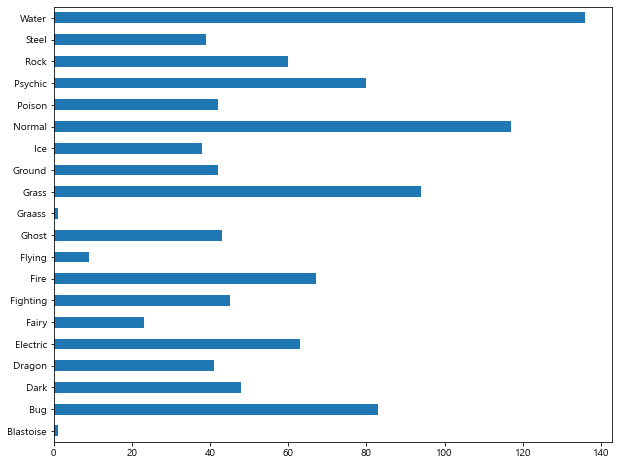

In [35]:
# 전체 포켓몬 -- Type 1 분포

df['type1'].value_counts(sort=False).sort_index().plot.barh()

# grass와 graass 합치기

In [38]:
# "전설의 포켓몬" 여부에 따른 Type 1 분포

T1_Total = pd.DataFrame(df['type1'].value_counts().sort_index())
T1_NotLeg = pd.DataFrame(df[df['legendary']==0].groupby('type1').size())
T1_count = pd.concat([T1_Total, T1_NotLeg], axis = 1)
T1_count.columns = ['Total', 'Not Legend']
T1_count['Legend'] = T1_count['Total'] - T1_count['Not Legend']
T1_count


,Total,Not Legend,Legend
Blastoise,1,1,0
Bug,83,82,1
Dark,48,43,5
Dragon,41,26,15
Electric,63,56,7
Fairy,23,20,3
Fighting,45,36,9
Fire,67,62,5
Flying,9,7,2
Ghost,43,40,3


<AxesSubplot:>

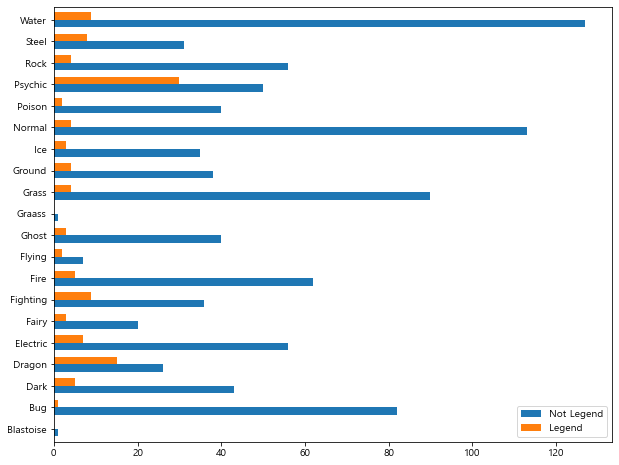

In [39]:
T1_count[['Not Legend', 'Legend']].plot.barh(width=0.7)

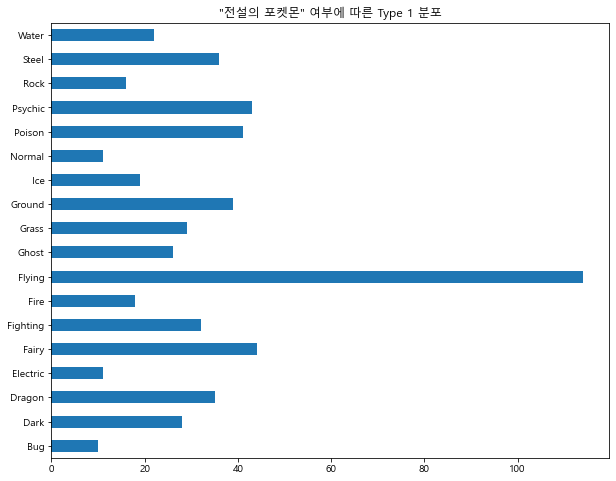

In [41]:
# 전체 포켓몬 -- Type 2 분포

df['type2'].value_counts(sort=False).sort_index().plot.barh()

plt.title('"전설의 포켓몬" 여부에 따른 Type 1 분포')
plt.show()

In [42]:
# "전설의 포켓몬" 여부에 따른 Type 2 분포

T2_Total = pd.DataFrame(df['type2'].value_counts().sort_index())
T2_NotLeg = pd.DataFrame(df[df['legendary']==0].groupby('type2').size())
T2_count = pd.concat([T2_Total, T2_NotLeg], axis = 1)
T2_count.columns = ['Total', 'Not Legend']
T2_count['Legend'] = T2_count['Total'] - T2_count['Not Legend']
T2_count

,Total,Not Legend,Legend
Bug,10,10,0
Dark,28,25,3
Dragon,35,28,7
Electric,11,10,1
Fairy,44,37,7
Fighting,32,25,7
Fire,18,15,3
Flying,114,98,16
Ghost,26,21,5
Grass,29,25,4


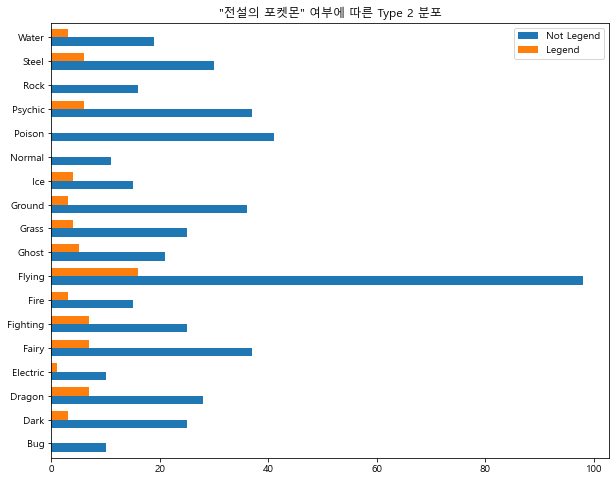

In [43]:
T2_count[['Not Legend', 'Legend']].plot.barh(width=0.7)

plt.title('"전설의 포켓몬" 여부에 따른 Type 2 분포')
plt.show()

### 포켓몬 세대generagion 분포

<AxesSubplot:>

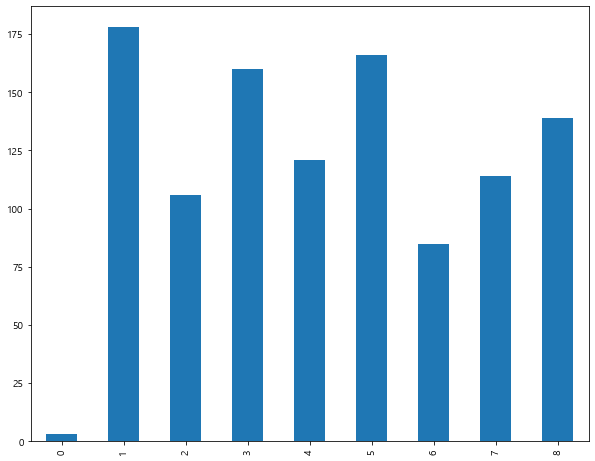

In [45]:
# 전체 포켓몬 -- 세대 분포

df['generation'].value_counts().sort_index().plot.bar()

In [46]:
# "전설의 포켓몬" 여부에 따른 세대 분포

gene_Leg = pd.DataFrame(df[df['legendary']==1].groupby('generation').size())
gene_NotLeg = pd.DataFrame(df[df['legendary']==0].groupby('generation').size())
gene_count = pd.concat([gene_Leg, gene_NotLeg], axis=1)
gene_count.columns = ['Legend', 'Not Legend']
gene_count

,Legend,Not Legend
generation,,
0,3,NaN
1,7,171.0
2,6,100.0
3,18,142.0
4,16,105.0
5,20,146.0
6,10,75.0
7,15,99.0
8,23,116.0


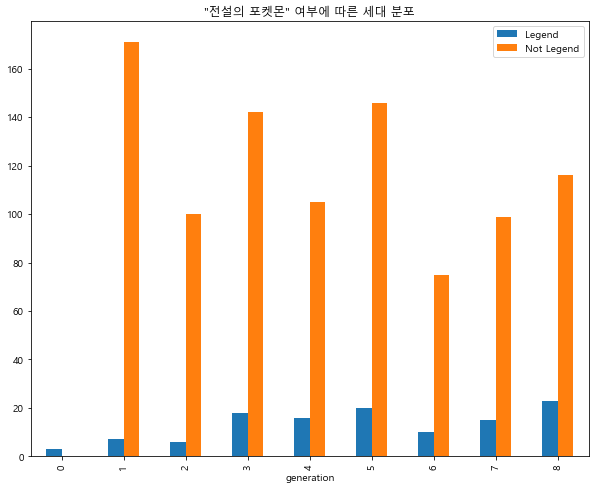

In [47]:
gene_count.plot.bar()
plt.title('"전설의 포켓몬" 여부에 따른 세대 분포')
plt.show()

## Logistic 회귀: 이진 분류

분류예측 목표 Feature인 "Lengendary" 값을 “1”/"0"으로 바꿉니다.

포켓몬의 세대를 나타나는 "Generation" 타입은 지금 "int"로 되어있지만, Feature의 의미상 해당 숫자는 분류 역할을 하고 있으므로 "str"타입으로 변환시키겠습니다.

분류 예측 시 이름 데이터가 예측에 도움이 없으므로 "Name"을 빼고 데이터셋을 제구성하겠습니다.

In [50]:
df['legendary'] = df['legendary'].astype(int)
df['generation'] = df['generation'].astype(str)
preprocessed_df = df[['type1', 'type2', 'total', 'hp', 'attack', 'defense', 
                      'sp_attack', 'sp_defense', 'speed', 'generation', 'legendary']]
preprocessed_df.head()


,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Grass,Poison,525,80,82,83,100,100,80,1,0
3,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Grass,Poison,525,80,82,83,100,100,80,1,0


### One-Hot Encoding

In [51]:
# pokemon type list 생성
def make_list(x1, x2):
    type_list = []
    type_list.append(x1)
    if x2 is not np.nan:
        type_list.append(x2)
    return type_list

preprocessed_df['type'] = preprocessed_df.apply(lambda x: make_list(x['type1'], x['type2']), axis=1)
preprocessed_df.head()

,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary,type
0,Grass,Poison,318,45,49,49,65,65,45,1,0,"[Grass, Poison]"
1,Grass,Poison,405,60,62,63,80,80,60,1,0,"[Grass, Poison]"
2,Grass,Poison,525,80,82,83,100,100,80,1,0,"[Grass, Poison]"
3,Grass,Poison,625,80,100,123,122,120,80,1,0,"[Grass, Poison]"
4,Grass,Poison,525,80,82,83,100,100,80,1,0,"[Grass, Poison]"


In [53]:
del preprocessed_df['type1']
del preprocessed_df['type2']
preprocessed_df.head()


,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary,type
0,318,45,49,49,65,65,45,1,0,"[Grass, Poison]"
1,405,60,62,63,80,80,60,1,0,"[Grass, Poison]"
2,525,80,82,83,100,100,80,1,0,"[Grass, Poison]"
3,625,80,100,123,122,120,80,1,0,"[Grass, Poison]"
4,525,80,82,83,100,100,80,1,0,"[Grass, Poison]"


In [54]:
# multi-lacel encoding
from sklearn.preprocessing import MultiLabelBinarizer

ml = MultiLabelBinarizer()
preprocessed_df = preprocessed_df.join(pd.DataFrame(ml.fit_transform(preprocessed_df.pop('type')),
                                                    columns = ml.classes_))


In [55]:
preprocessed_df.head()

,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary,Blastoise,...,Graass,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,318,45,49,49,65,65,45,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,405,60,62,63,80,80,60,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,525,80,82,83,100,100,80,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,625,80,100,123,122,120,80,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,525,80,82,83,100,100,80,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [56]:
# apply one-hot encoding to 'Generation'
preprocessed_df = pd.get_dummies(preprocessed_df)  # df name입력하면 str var를 자동 식별하여 encoding 진행함
# preprocessed_ddf = pd.get_dummies(preprocessed_df['Generation'])  # 작업할 var 지정
preprocessed_df.head()


,total,hp,attack,defense,sp_attack,sp_defense,speed,legendary,Blastoise,Bug,...,Water,generation_0,generation_1,generation_2,generation_3,generation_4,generation_5,generation_6,generation_7,generation_8
0,318,45,49,49,65,65,45,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,405,60,62,63,80,80,60,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,525,80,82,83,100,100,80,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,625,80,100,123,122,120,80,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,525,80,82,83,100,100,80,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### 표준화: Scaling

In [57]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   total         1072 non-null   int64
 1   hp            1072 non-null   int64
 2   attack        1072 non-null   int64
 3   defense       1072 non-null   int64
 4   sp_attack     1072 non-null   int64
 5   sp_defense    1072 non-null   int64
 6   speed         1072 non-null   int64
 7   legendary     1072 non-null   int32
 8   Blastoise     1072 non-null   int32
 9   Bug           1072 non-null   int32
 10  Dark          1072 non-null   int32
 11  Dragon        1072 non-null   int32
 12  Electric      1072 non-null   int32
 13  Fairy         1072 non-null   int32
 14  Fighting      1072 non-null   int32
 15  Fire          1072 non-null   int32
 16  Flying        1072 non-null   int32
 17  Ghost         1072 non-null   int32
 18  Graass        1072 non-null   int32
 19  Grass         1072 non-null

In [58]:
from sklearn.preprocessing import StandardScaler

# feature standardization
scaler = StandardScaler()
scale_columns = ['total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
preprocessed_df[scale_columns] = scaler.fit_transform(preprocessed_df[scale_columns])
preprocessed_df.head()


,total,hp,attack,defense,sp_attack,sp_defense,speed,legendary,Blastoise,Bug,...,Water,generation_0,generation_1,generation_2,generation_3,generation_4,generation_5,generation_6,generation_7,generation_8
0,-1.012881,-0.949040,-0.984283,-0.832490,-0.253566,-0.267778,-0.791455,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,-0.295784,-0.390495,-0.583647,-0.383679,0.206163,0.269448,-0.292490,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.693316,0.354231,0.032716,0.257480,0.819136,0.985749,0.372796,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1.517565,0.354231,0.587442,1.539799,1.493406,1.702050,0.372796,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.693316,0.354231,0.032716,0.257480,0.819136,0.985749,0.372796,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### train-test set split

In [59]:
from sklearn.model_selection import train_test_split

X = preprocessed_df.loc[:, preprocessed_df.columns != 'legendary']
y = preprocessed_df['legendary']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


In [60]:
x_train.shape, y_train.shape

((804, 36), (804,))

In [61]:
x_test.shape, y_test.shape

((268, 36), (268,))

## Logistic Regression 모델 학습

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fit in Training set
logit = LogisticRegression(random_state=0)
logit.fit(x_train, y_train)

# Predict in Test set
y_pred = logit.predict(x_test)


### 모델 평가

In [63]:
# classification result for test set

print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test, y_pred))
print("Recall: %.3f" % recall_score(y_test, y_pred))
print("F1: %.3f" % f1_score(y_test, y_pred))


accuracy: 0.94
Precision: 0.773
Recall: 0.630
F1: 0.694


acc는 높지만, precision, recall, f1 score가 낮은 편. -> 정확도precision 문제

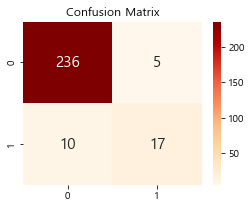

In [64]:
# confusion matrix

np.set_printoptions(suppress=True)

from sklearn.metrics import confusion_matrix

# print confusion matrix
confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()


negative(legendary=false/0)인 경우가 183으로 훨씬 많음 -> 클래스 불균형에 의한 정확도 문제

## 클래스 불균형 조정

In [66]:
preprocessed_df['legendary'].value_counts()

0    954
1    118
Name: legendary, dtype: int64

In [68]:
# 1:1 샘플링 -> positive, negative 비율을 1:1로 샘플링
positive_random_idx = preprocessed_df[preprocessed_df['legendary']==1].sample(65, random_state=12).index.tolist()
negative_random_idx = preprocessed_df[preprocessed_df['legendary']==0].sample(65, random_state=12).index.tolist()


In [69]:
# train-test set split
random_idx = positive_random_idx + negative_random_idx
X = preprocessed_df.loc[random_idx, preprocessed_df.columns != 'legendary']
y = preprocessed_df['legendary'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


In [70]:
x_train.shape, y_train.shape

((97, 36), (97,))

In [71]:
x_test.shape, y_test.shape

((33, 36), (33,))

갑자기 포켓몬이 많이 줄어들었군요ㅠㅠ

In [72]:
# Fit in Training set
logit2 = LogisticRegression(random_state=0)
logit2.fit(x_train, y_train)

# Predict in Test set
y_pred2 = logit2.predict(x_test)


In [73]:
# clssification result for test set

print("accuracy: %.2f" % accuracy_score(y_test, y_pred2))
print("Precision: %.3f" % precision_score(y_test, y_pred2))
print("Recall: %.3f" % recall_score(y_test, y_pred2))
print("F1: %.3f" % f1_score(y_test, y_pred2))


accuracy: 0.91
Precision: 0.933
Recall: 0.875
F1: 0.903


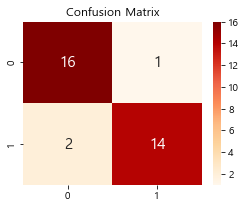

In [74]:
# confusion matrix

confu2 = confusion_matrix(y_true=y_test, y_pred = y_pred2)

plt.figure(figsize=(4, 3))
sns.heatmap(confu2, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()


## Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [76]:
# RandomForest fitting
dt = DecisionTreeClassifier(random_state=0)

dt.fit(x_train, y_train)

# Predict in Test set
y_pred_dt = dt.predict(x_test)

In [77]:
print("accuracy: %.2f" % accuracy_score(y_test, y_pred2))
print("Precision: %.3f" % precision_score(y_test, y_pred2))
print("Recall: %.3f" % recall_score(y_test, y_pred2))
print("F1: %.3f" % f1_score(y_test, y_pred2))

accuracy: 0.91
Precision: 0.933
Recall: 0.875
F1: 0.903


## Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
# RandomForest fitting
rf = RandomForestClassifier(random_state=0)

rf.fit(x_train, y_train)

# Predict in Test set
y_pred_rf = rf.predict(x_test)

In [80]:
print("accuracy: %.2f" % accuracy_score(y_test, y_pred2))
print("Precision: %.3f" % precision_score(y_test, y_pred2))
print("Recall: %.3f" % recall_score(y_test, y_pred2))
print("F1: %.3f" % f1_score(y_test, y_pred2))

accuracy: 0.91
Precision: 0.933
Recall: 0.875
F1: 0.903


데이터가 너무 작아서 정확도가 너무 높음!

분류는 확실한 타겟 값이 있어야 해서 분석은 쉽지만 새로운 데이터를 찾기 어려움! 더 못찾으면 앙상블, 부스팅 모델들을 적용하기 위해 심장병 데이터, 신용 불량자 데이터 등 기존에 많이 활용되는 데이터 활용 예정